### This project predict the customer is churn or not. The Churn means customer is quitting the product or service. This will find the customer will quite the service or not in future based on the past data

In [66]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.isnull().sum() # Are their null values?

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# convert column "TotalCharges" of a DataFrame, errors='coerce' for convert bad non numeric values to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [8]:
df.isnull().sum() # Are their null values?

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Dropping the null value rows
df=df.dropna()

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size =0.25, random_state = 0)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc=StandardScaler()

In [28]:
numerical = train.select_dtypes(include = ['int64','float64'])

In [29]:
numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3540,0,72,108.65,7726.35
3504,0,68,19.95,1377.70
6715,0,11,89.20,990.30
2866,0,12,84.60,1017.35
6609,0,1,20.10,20.10
...,...,...,...,...
4939,0,1,18.90,18.90
3269,0,65,24.80,1600.95
1658,0,50,105.95,5341.80
2612,0,14,80.45,1137.05


In [30]:
df_num = pd.DataFrame(sc.fit_transform(numerical),columns = numerical.columns)

In [31]:
df_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.436793,1.628149,1.460662,2.416469
1,-0.436793,1.464856,-1.495682,-0.392705
2,-0.436793,-0.862073,0.812400,-0.564123
3,-0.436793,-0.821250,0.659083,-0.552154
4,-0.436793,-1.270306,-1.490683,-0.993420
...,...,...,...,...
5269,-0.436793,-1.270306,-1.530679,-0.993951
5270,-0.436793,1.342386,-1.334033,-0.293920
5271,-0.436793,0.730036,1.370672,1.361345
5272,-0.436793,-0.739603,0.520765,-0.499188


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()

In [34]:
categorical = train.select_dtypes(include = ['object'])

In [36]:
categorical.shape

(5274, 17)

In [37]:
df_cat=categorical.apply(LabelEncoder().fit_transform)


In [38]:
df_cat

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
3540,542,0,1,1,1,0,1,2,2,2,2,2,2,2,1,0,0
3504,1942,1,1,1,1,0,2,1,1,1,1,1,1,2,0,0,0
6715,610,0,0,0,1,2,1,0,0,2,0,2,0,0,1,2,0
2866,3994,0,0,0,1,0,1,0,2,0,0,0,2,0,1,2,0
6609,515,1,0,0,1,0,2,1,1,1,1,1,1,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,5265,1,0,0,1,0,2,1,1,1,1,1,1,0,0,3,0
3269,1375,1,0,0,1,2,2,1,1,1,1,1,1,1,0,1,0
1658,638,1,1,1,1,2,1,2,0,2,0,2,2,0,0,1,1
2612,4364,0,1,1,1,2,0,0,2,0,2,2,2,0,0,1,0


In [43]:
# Used reset index to avoid the extra NAN rows when concatinating
traincomb_df = pd.concat([df_num.reset_index(drop=True),df_cat.reset_index(drop=True)],axis=1)

In [44]:
traincomb_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-0.436793,1.628149,1.460662,2.416469,542,0,1,1,1,0,...,2,2,2,2,2,2,2,1,0,0
1,-0.436793,1.464856,-1.495682,-0.392705,1942,1,1,1,1,0,...,1,1,1,1,1,1,2,0,0,0
2,-0.436793,-0.862073,0.812400,-0.564123,610,0,0,0,1,2,...,0,0,2,0,2,0,0,1,2,0
3,-0.436793,-0.821250,0.659083,-0.552154,3994,0,0,0,1,0,...,0,2,0,0,0,2,0,1,2,0
4,-0.436793,-1.270306,-1.490683,-0.993420,515,1,0,0,1,0,...,1,1,1,1,1,1,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,-0.436793,-1.270306,-1.530679,-0.993951,5265,1,0,0,1,0,...,1,1,1,1,1,1,0,0,3,0
5270,-0.436793,1.342386,-1.334033,-0.293920,1375,1,0,0,1,2,...,1,1,1,1,1,1,1,0,1,0
5271,-0.436793,0.730036,1.370672,1.361345,638,1,1,1,1,2,...,2,0,2,0,2,2,0,0,1,1
5272,-0.436793,-0.739603,0.520765,-0.499188,4364,0,1,1,1,2,...,0,2,0,2,2,2,0,0,1,0


In [45]:
numerical_test = test.select_dtypes(include = ['int64','float64'])

In [46]:
df_num_test = pd.DataFrame(sc.transform(numerical_test),columns = numerical_test.columns)

In [47]:
categorical_test = test.select_dtypes(include = ['object'])

In [54]:
df_cat_test=categorical_test.apply(LabelEncoder().fit_transform)

In [60]:
testcomb_df = pd.concat([df_num_test.reset_index(drop=True),df_cat_test.reset_index(drop=True)],axis=1)

In [58]:
testcomb_df=testcomb_df.pop('Churn')

In [78]:
testcomb_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-0.436793,-1.270306,-1.472352,-0.993177,882,1,0,0,1,0,...,1,1,1,1,1,1,0,0,2,0
1,-0.436793,-0.657957,-1.474018,-0.856184,130,1,0,0,1,0,...,1,1,1,1,1,1,0,1,1,0
2,-0.436793,-1.270306,-1.500682,-0.993553,1502,0,0,0,1,0,...,1,1,1,1,1,1,0,0,1,0
3,-0.436793,-1.270306,-1.352365,-0.991584,228,1,0,0,0,1,...,0,0,0,0,0,0,0,1,2,1
4,2.289415,-1.270306,0.319120,-0.969394,605,1,0,0,1,2,...,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,-0.436793,0.770859,0.385779,0.752709,1377,1,1,1,1,0,...,2,0,0,2,2,2,1,1,0,0
1754,-0.436793,1.301562,-1.337366,-0.275424,1506,0,0,0,1,2,...,1,1,1,1,1,1,1,0,3,0
1755,-0.436793,-1.270306,-0.349141,-0.978265,743,1,0,0,1,2,...,0,0,2,0,0,0,0,0,2,1
1756,2.289415,0.893329,0.014153,0.559631,1408,1,0,0,1,0,...,0,0,2,2,0,2,1,0,0,0


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [63]:
from sklearn.metrics import accuracy_score

In [137]:
classifier_names=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','Support Vector machines','Naivebayes']

In [138]:
classifiers = [
                LogisticRegression(),
                DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators = 100), 
                KNeighborsClassifier(n_neighbors = 8),
                svm.SVC(),
                GaussianNB()
]

In [139]:
accuracies=[]
for classifier in classifiers:
    model = classifier.fit(traincomb_df.loc[:, traincomb_df.columns!='Churn'],traincomb_df['Churn'])
    pred = model.predict(testcomb_df.loc[:, testcomb_df.columns!='Churn'])
    accuracy = accuracy_score(pred,testcomb_df['Churn'])
    accuracies.append(accuracy)
    print("Accuracy: ",accuracy)

Accuracy:  0.7918088737201365
Accuracy:  0.7138794084186576
Accuracy:  0.7906712172923777
Accuracy:  0.7286689419795221
Accuracy:  0.7457337883959044
Accuracy:  0.7525597269624573


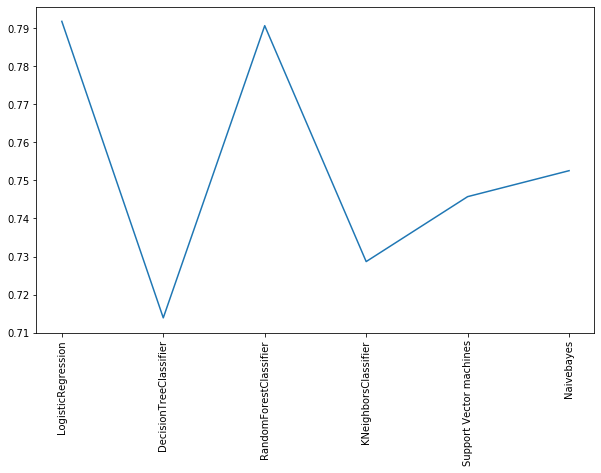

In [145]:
#Accuracies plot
plt.figure(figsize=(10,6))
plt.plot(classifier_names, accuracies, label = "line")
plt.xticks(rotation = 90)
plt.show()

In [75]:
#In the above output Random forest given good accuracy so here it is the best algorithm for this dataset
model = RandomForestClassifier(n_estimators = 100)
model.fit(traincomb_df.loc[:, traincomb_df.columns!='Churn'],traincomb_df['Churn'])
pred1 = model.predict(testcomb_df.loc[:, testcomb_df.columns!='Churn'])
accuracy = accuracy_score(pred,testcomb_df['Churn'])
print("Accuracy: ",accuracy)

Accuracy:  0.7997724687144482


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testcomb_df['Churn'],pred1)

array([[1186,  125],
       [ 230,  217]], dtype=int64)

In [118]:
!pip install scikit-plot

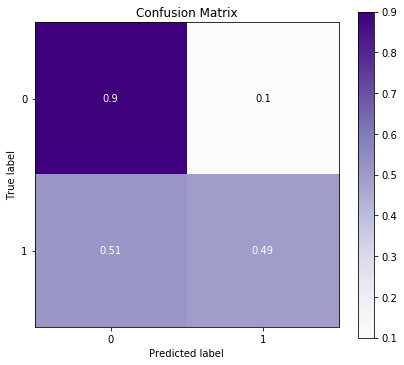

In [119]:
import scikitplot as skplt
fig = plt.figure(figsize=(15,6))
ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(testcomb_df['Churn'],pred1,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);

In [80]:
print(metrics.classification_report(testcomb_df['Churn'],pred1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1311
           1       0.63      0.49      0.55       447

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.71      1758
weighted avg       0.79      0.80      0.79      1758



In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [84]:
# predict probabilities
rf_probs = model.predict_proba(testcomb_df.loc[:, testcomb_df.columns!='Churn'])

In [87]:
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

In [88]:
# auc scores
rf_auc = roc_auc_score(testcomb_df['Churn'], rf_probs)

In [89]:
rf_auc

0.8363451913511042

In [94]:
# calculate roc curves
lr_fpr, lr_tpr,thresh1 = roc_curve(testcomb_df['Churn'], rf_probs)

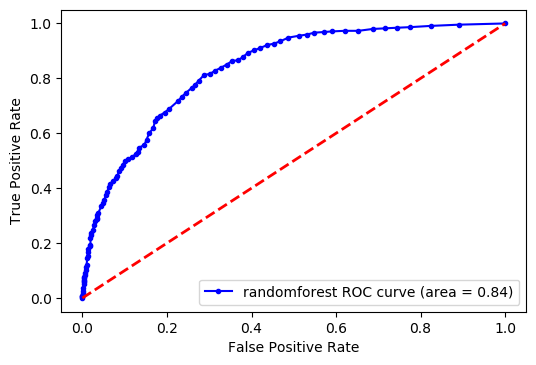

In [112]:
plt.figure(dpi=100)
lw = 2
plt.plot(lr_fpr, lr_tpr, marker='.', color="blue",label="randomforest ROC curve (area = %0.2f)" %rf_auc)
plt.plot([0, 1], [0, 1], color="red", lw=lw, linestyle="--")
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()